In [58]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1)

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [62]:
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for i in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot results
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    torch.save(net1, 'net.pkl')  # 保存整个神经网络
    torch.save(net1.state_dict(), 'net_params.pkl')  # 只保留图中节点参数,parameters

In [63]:
# 提取结构就有说法了，一方面是直接提取整个神经网络，一方面是建立一个和之前一模一样的神经网络结构，
# 那么只需要提取参数即可
def store_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

def store_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

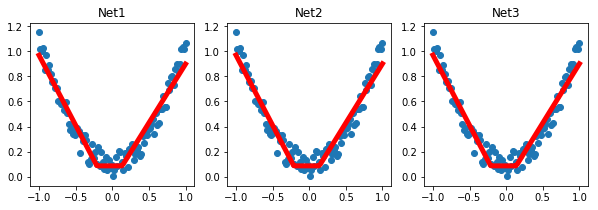

In [64]:
save()
store_net()
store_params()

In [ ]:
# 训练的数走一次即可，后面的训练走两次，提取模型